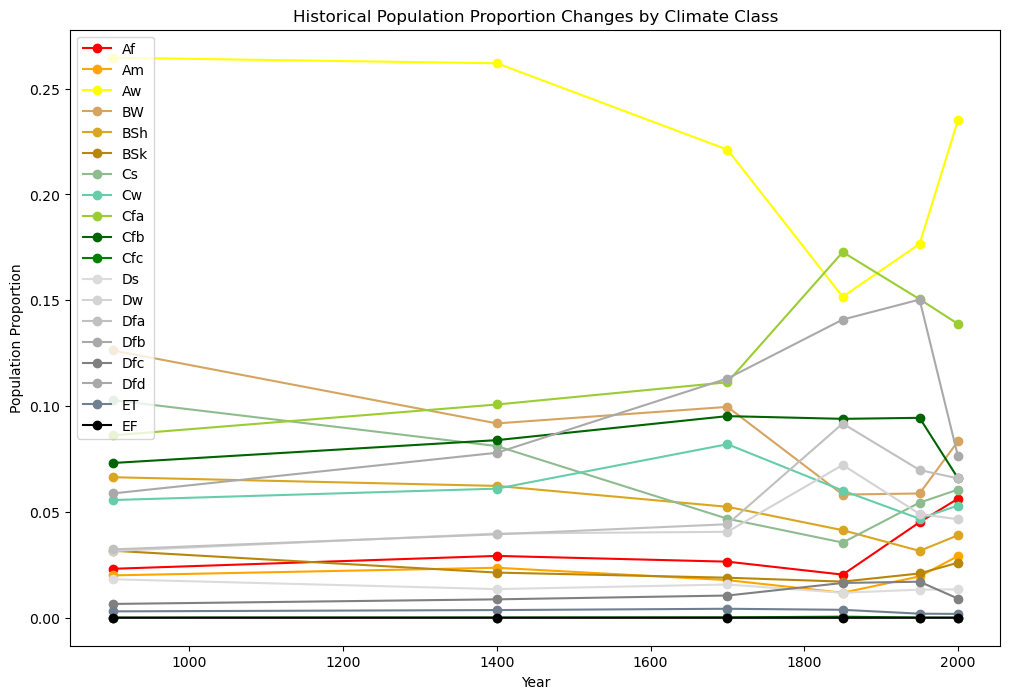

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, OrderedDict

# 気候区分の色設定
climate_colors = OrderedDict({
    'Af': (255/255, 0/255, 0/255),
    'Am': (255/255, 165/255, 0/255),
    'Aw': (255/255, 255/255, 0/255),
    'BW': (214/255, 164/255, 96/255),
    'BSh': (218/255, 165/255, 32/255),
    'BSk': (184/255, 134/255, 11/255),
    'Cs': (143/255, 188/255, 143/255),
    'Cw': (102/255, 205/255, 170/255),
    'Cfa': (154/255, 205/255, 50/255),
    'Cfb': (0/255, 100/255, 0/255),
    'Cfc': (0/255, 128/255, 0/255),
    'Ds': (220/255, 220/255, 220/255),
    'Dw': (211/255, 211/255, 211/255),
    'Dfa': (192/255, 192/255, 192/255),
    'Dfb': (169/255, 169/255, 169/255),
    'Dfc': (128/255, 128/255, 128/255),
    'Dfd': (169/255, 169/255, 169/255),
    'ET': (112/255, 128/255, 144/255),
    'EF': (0/255, 0/255, 0/255)
})

# 気候区分の順序
climate_class_order = list(climate_colors.keys())

# 気候データのダウンロード
years = [900, 1400, 1700, 1850, 1950, 2000]
# 気候区分のデータを格納する辞書
new_climate_data_str = {}
pop_count_data = {}

# 各年ごとの気候区分ごとの人口を格納する辞書
climate_population_over_years = {climate_class: [] for climate_class in climate_class_order}

for year in years:
    # 気候データのロード
    new_climate_data_str[year] = np.load(f'climate_class_{year}_12grid.npy')
    # 人口データのロード
    pop_count_data[year] = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')

    # 各年の総人口を計算
    total_population = np.sum(pop_count_data[year][pop_count_data[year] >= 0])

    # pop_count_dataが0以上のグリッドについて、その気候区分を調べ、各気候区分ごとの人口を算出
    for climate_class in climate_class_order:
        # 気候区分のデータを取得
        climate_data = new_climate_data_str[year][pop_count_data[year] >= 0]
        # 気候区分が一致するグリッドの人口データを取得
        pop_count = pop_count_data[year][pop_count_data[year] >= 0][climate_data == climate_class]
        # 気候区分ごとの人口を集計
        total_pop_count = np.sum(pop_count)
        # 各気候区分ごとの人口を総人口に対する割合で格納
        climate_population_over_years[climate_class].append(total_pop_count / total_population)

# 各気候区分の人口の歴史的推移を折れ線グラフで描画、その際、色は気候区分に対応する色を使用
plt.figure(figsize=(12, 8))
for climate_class in climate_class_order:
    plt.plot(years, climate_population_over_years[climate_class], label=climate_class, color=climate_colors[climate_class], marker='o')

plt.xlabel('Year')
plt.ylabel('Population Proportion')
plt.title('Historical Population Proportion Changes by Climate Class')
plt.legend()
plt.show()

In [3]:
import numpy as np
from collections import Counter, OrderedDict

years = [900, 1400, 1700, 1850, 1950, 2000]
models=['GISS', 'IPSL','HadCM3','MPI','CSIRO']
class_labels = {}


# 文字列を数値にマッピングする辞書
climate_class_mapping = {
    'Af': 1, 'Am': 2, 'Aw': 3, 'BW': 4, 'BSh': 5, 'BSk': 6,
    'Cs': 7, 'Cw': 8, 'Cfa': 9, 'Cfb': 10, 'Cfc': 11,
    'Ds': 12, 'Dw': 13, 'Dfa': 14, 'Dfb': 15, 'Dfc': 16, 'Dfd': 17,
    'ET': 18, 'EF': 19, 'nan': 0,
}

for year in years:
    for model in models:
        # 現状、climate_classはそれぞれ180×360の配列であるから、それを2160×4320に変換する
        climate_data = np.load(f'/work/a06/tsuda/m1/climate_class_{model}_{year}.npy', allow_pickle=True)
        new_climate_data = np.zeros((2160, 4320))

        # 180×360のデータの1グリッドを、12×12に分割して、それぞれのグリッドに同じ文字を入れる
        for i in range(180):
            for j in range(360):
                # 文字列を数値に変換
                climate_value = climate_data[i, j]
                if climate_value in climate_class_mapping:
                    new_climate_data[i*12:(i+1)*12, j*12:(j+1)*12] = climate_class_mapping[climate_value]
                else:
                    # nanなどの値は0にマッピング
                    new_climate_data[i*12:(i+1)*12, j*12:(j+1)*12] = climate_class_mapping['nan']
        # 今数字になっているnew_climate_dataを文字列にもどす
        reverse_climate_class_mapping = {
            1: 'Af', 2: 'Am', 3: 'Aw', 4: 'BW', 5: 'BSh', 6: 'BSk',
            7: 'Cs', 8: 'Cw', 9: 'Cfa', 10: 'Cfb', 11: 'Cfc',
            12: 'Ds', 13: 'Dw', 14: 'Dfa', 15: 'Dfb', 16: 'Dfc', 17: 'Dfd',
            18: 'ET', 19: 'EF', 0: 'nan'
        }
        #climate_class_order = list(reverse_climate_class_mapping.keys())

        # new_climate_dataの数値を文字列に変換
        new_climate_data_str = np.vectorize(reverse_climate_class_mapping.get)(new_climate_data)

        # 変換結果を表示
        print(new_climate_data_str)

        #print(new_climate_data.shape)
        np.save(f'climate_class_{model}_{year}_12grid.npy', new_climate_data_str)

    


[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ...
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']]
[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ...
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']]
[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ...
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']]
[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ...
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']]
[['ET' 'ET' 'ET' ... 'ET' 'ET' 'ET']
 ['ET' 'ET' 'ET' ... 'ET' 'ET' 'ET']
 ['ET' 'ET' 'E

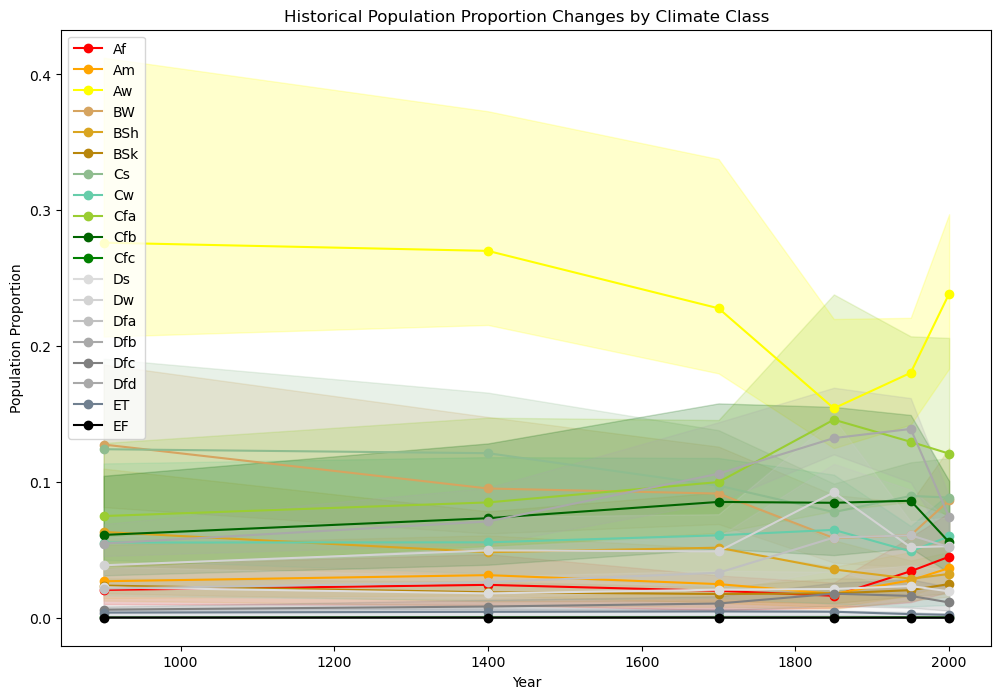

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, OrderedDict

# 気候区分の色設定
climate_colors = OrderedDict({
    'Af': (255/255, 0/255, 0/255),
    'Am': (255/255, 165/255, 0/255),
    'Aw': (255/255, 255/255, 0/255),
    'BW': (214/255, 164/255, 96/255),
    'BSh': (218/255, 165/255, 32/255),
    'BSk': (184/255, 134/255, 11/255),
    'Cs': (143/255, 188/255, 143/255),
    'Cw': (102/255, 205/255, 170/255),
    'Cfa': (154/255, 205/255, 50/255),
    'Cfb': (0/255, 100/255, 0/255),
    'Cfc': (0/255, 128/255, 0/255),
    'Ds': (220/255, 220/255, 220/255),
    'Dw': (211/255, 211/255, 211/255),
    'Dfa': (192/255, 192/255, 192/255),
    'Dfb': (169/255, 169/255, 169/255),
    'Dfc': (128/255, 128/255, 128/255),
    'Dfd': (169/255, 169/255, 169/255),
    'ET': (112/255, 128/255, 144/255),
    'EF': (0/255, 0/255, 0/255)
})

# 気候区分の順序
climate_class_order = list(climate_colors.keys())

# 気候データのダウンロード
years = [900, 1400, 1700, 1850, 1950, 2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']
# 気候区分のデータを格納する辞書
new_climate_data_str = {}
pop_count_data = {}

# 各年ごとの気候区分ごとの人口を格納する辞書
climate_population_over_years = {climate_class: [] for climate_class in climate_class_order}

for year in years:
    for model in models:
        # 気候データのロード
        new_climate_data_str[(year, model)] = np.load(f'climate_class_{model}_{year}_12grid.npy')
        # 人口データのロード
        pop_count_data[(year, model)] = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')

# 各気候区分ごとの人口割合を計算
for year in years:
    for climate_class in climate_class_order:
        model_populations = []
        for model in models:
            # 各年の総人口を計算
            total_population = np.sum(pop_count_data[(year, model)][pop_count_data[(year, model)] >= 0])
            # pop_count_dataが0以上のグリッドについて、その気候区分を調べ、各気候区分ごとの人口を算出
            climate_data = new_climate_data_str[(year, model)][pop_count_data[(year, model)] >= 0]
            pop_count = pop_count_data[(year, model)][pop_count_data[(year, model)] >= 0][climate_data == climate_class]
            total_pop_count = np.sum(pop_count)
            model_populations.append(total_pop_count / total_population)
        # 各モデルの平均、最大、最小を計算
        climate_population_over_years[climate_class].append({
            'mean': np.mean(model_populations),
            'max': np.max(model_populations),
            'min': np.min(model_populations)
        })

# 各気候区分の人口の歴史的推移を折れ線グラフで描画、その際、色は気候区分に対応する色を使用
plt.figure(figsize=(12, 8))
for climate_class in climate_class_order:
    means = [data['mean'] for data in climate_population_over_years[climate_class]]
    maxs = [data['max'] for data in climate_population_over_years[climate_class]]
    mins = [data['min'] for data in climate_population_over_years[climate_class]]
    plt.plot(years, means, label=climate_class, color=climate_colors[climate_class], marker='o')
    plt.fill_between(years, mins, maxs, color=climate_colors[climate_class], alpha=0.2)

plt.xlabel('Year')
plt.ylabel('Population Proportion')
plt.title('Historical Population Proportion Changes by Climate Class')
plt.legend()
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, OrderedDict
area_data = np.load('/work/a06/tsuda/m1/12grid_area_result.npy')
pop = np.load('/work/a06/tsuda/m1/pop_count_data_900.npy')
total_land_area=np.sum(area_data[pop>=0])
print(total_land_area)

135039171.37147778


/tmp/ipykernel_519529/2594661737.py:71: RuntimeWarning: invalid value encountered in scalar divide
  model_populations.append((total_pop_count/area)/(total_population/total_land_area))


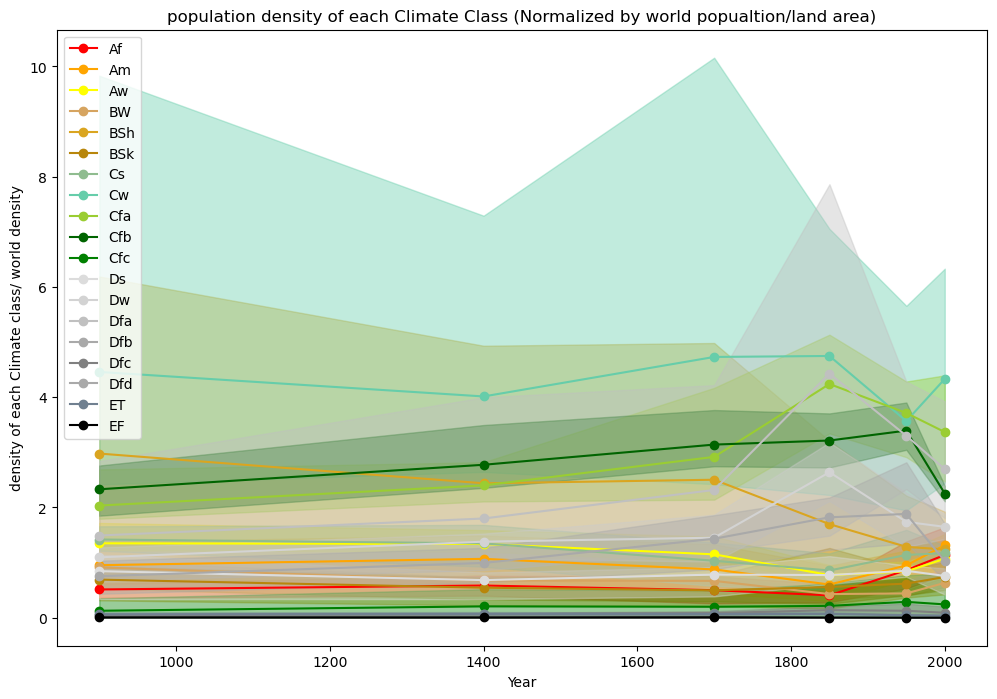

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, OrderedDict

# 各グリッドの面積データをロード
area_data = np.load('/work/a06/tsuda/m1/12grid_area_result.npy')


# 気候区分の色設定
climate_colors = OrderedDict({
    'Af': (255/255, 0/255, 0/255),
    'Am': (255/255, 165/255, 0/255),
    'Aw': (255/255, 255/255, 0/255),
    'BW': (214/255, 164/255, 96/255),
    'BSh': (218/255, 165/255, 32/255),
    'BSk': (184/255, 134/255, 11/255),
    'Cs': (143/255, 188/255, 143/255),
    'Cw': (102/255, 205/255, 170/255),
    'Cfa': (154/255, 205/255, 50/255),
    'Cfb': (0/255, 100/255, 0/255),
    'Cfc': (0/255, 128/255, 0/255),
    'Ds': (220/255, 220/255, 220/255),
    'Dw': (211/255, 211/255, 211/255),
    'Dfa': (192/255, 192/255, 192/255),
    'Dfb': (169/255, 169/255, 169/255),
    'Dfc': (128/255, 128/255, 128/255),
    'Dfd': (169/255, 169/255, 169/255),
    'ET': (112/255, 128/255, 144/255),
    'EF': (0/255, 0/255, 0/255)
})

# 気候区分の順序
climate_class_order = list(climate_colors.keys())

# 気候データのダウンロード
years = [900, 1400, 1700, 1850, 1950, 2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']
# 気候区分のデータを格納する辞書
new_climate_data_str = {}
pop_count_data = {}

# 各年ごとの気候区分ごとの人口を格納する辞書
climate_population_over_years = {climate_class: [] for climate_class in climate_class_order}

for year in years:
    for model in models:
        # 気候データのロード
        new_climate_data_str[(year, model)] = np.load(f'climate_class_{model}_{year}_12grid.npy')
        # 人口データのロード
        pop_count_data[(year, model)] = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')




# 各気候区分ごとの人口割合を計算
for year in years:
    for climate_class in climate_class_order:
        model_populations = []
        for model in models:
            # 各年の総人口を計算
            total_population = np.sum(pop_count_data[(year, model)][pop_count_data[(year, model)] >= 0])
            # pop_count_dataが0以上のグリッドについて、その気候区分を調べ、各気候区分ごとの人口を算出
            climate_data = new_climate_data_str[(year, model)][pop_count_data[(year, model)] >= 0]
            pop_count = pop_count_data[(year, model)][pop_count_data[(year, model)] >= 0][climate_data == climate_class]
            total_pop_count = np.sum(pop_count)
            # 各気候区分の陸地グリッドの総面積を計算
            area = np.sum(area_data[pop_count_data[(year, model)] >= 0][climate_data == climate_class])
            # 面積で正規化
            #model_populations.append((total_pop_count / total_population) / area)
            #世界全体の人口密度に対する比であらわす
            model_populations.append((total_pop_count/area)/(total_population/total_land_area))
        # 各モデルの平均、最大、最小を計算
        climate_population_over_years[climate_class].append({
            'mean': np.mean(model_populations),
            'max': np.max(model_populations),
            'min': np.min(model_populations)
        })

# 各気候区分の人口の歴史的推移を折れ線グラフで描画、その際、色は気候区分に対応する色を使用
plt.figure(figsize=(12, 8))
for climate_class in climate_class_order:
    means = [data['mean'] for data in climate_population_over_years[climate_class]]
    maxs = [data['max'] for data in climate_population_over_years[climate_class]]
    mins = [data['min'] for data in climate_population_over_years[climate_class]]
    plt.plot(years, means, label=climate_class, color=climate_colors[climate_class], marker='o')
    plt.fill_between(years, mins, maxs, color=climate_colors[climate_class], alpha=0.4)

plt.xlabel('Year')
plt.ylabel('density of each Climate class/ world density')
plt.title('population density of each Climate Class (Normalized by world popualtion/land area)')
plt.legend()
plt.show()